<a href="https://colab.research.google.com/github/Chetna1519/House-Price-Prediction/blob/main/Prediction_House_Prices_(Assignment_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from scipy import stats
from scipy.stats import norm, skew

In [ ]:
import warnings
warnings.simplefilter('ignore')

Task 1 :- **Data Understanding**

In [ ]:
# loading the data
dataset = pd.read_csv('/content/Dataset of House Price Prediction.csv')

In [ ]:
# Looking at the first five rows of the dataset
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# shape of the dataset
dataset.shape

(4600, 18)

In [ ]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# describing the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.363696,0.875177,0.0,2.00,2.00000,3.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.565000,0.567390,1.0,1.00,2.00000,2.00,4.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


I have already done some preprocessing part of the dataset using excel.

In [ ]:
# converting data types of columns
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['street']   = dataset['street'].astype('string')
dataset['city'] = dataset['city'].astype('string')
dataset['statezip'] = dataset['statezip'].astype('string')
dataset['country'] = dataset['country'].astype('string')

In [ ]:
# extract feature from datetime column
dataset.insert(1, 'year', dataset.date.dt.year)

In [ ]:
dataset.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-02-05,2014,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-02-05,2014,2384000.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-02-05,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-02-05,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-02-05,2014,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Task 2 :- **Data Cleaning**

Handling missing and 0 values

In [ ]:
# checking for the missing and null values
dataset.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

We seen that there are no missing value present in the dataset.

But there are 0 value present in some columns which will impact the whole model.

Task 3 :- **Feature Engineering**

In [ ]:
# Removing rows having price values 0

#checking price having value 0
price_zero = (dataset.price == 0).sum()
print('Total rows having zero value :',price_zero)

#drop the column having price value 0
dataset['price'].replace(0, np.nan, inplace = True)
dataset.dropna(inplace = True)

#checking shape of the dataset
print('Shape of the dataset after removing price value 0 :',dataset.shape)

Total rows having zero value : 49
Shape of the dataset after removing price value 0 : (4551, 19)


In [ ]:
# Removing or droping the unnecessary columns from the dataset
dataset = dataset.drop(['date', 'street','country'], axis = 1)
dataset.head()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2014,2384000.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042
3,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,2014,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [ ]:
# Number of unique value in the dataset
dataset.nunique(axis = 0)

year                1
price            1740
bedrooms           10
bathrooms           9
sqft_living       561
sqft_lot         3087
floors              4
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
city               44
statezip           77
dtype: int64

Handling Categorical Features

In [ ]:
# checking datatype of the dataset
dataset.dtypes

year               int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              string
statezip          string
dtype: object

In [ ]:
# Treating statezip column and extracting the numeric code only
dataset['statezip'] = dataset['statezip'].str.split().str[1]

# Reshape the column to 2D array with a single feature
dataset['statezip'] = np.reshape(dataset['statezip'].values, (-1,1))

In [ ]:
# Converting datatype of statezip columns
dataset['statezip'] = dataset['statezip'].astype(int)

In [ ]:
# Checking the datatype of the dataset again
dataset.dtypes

year               int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              string
statezip           int64
dtype: object

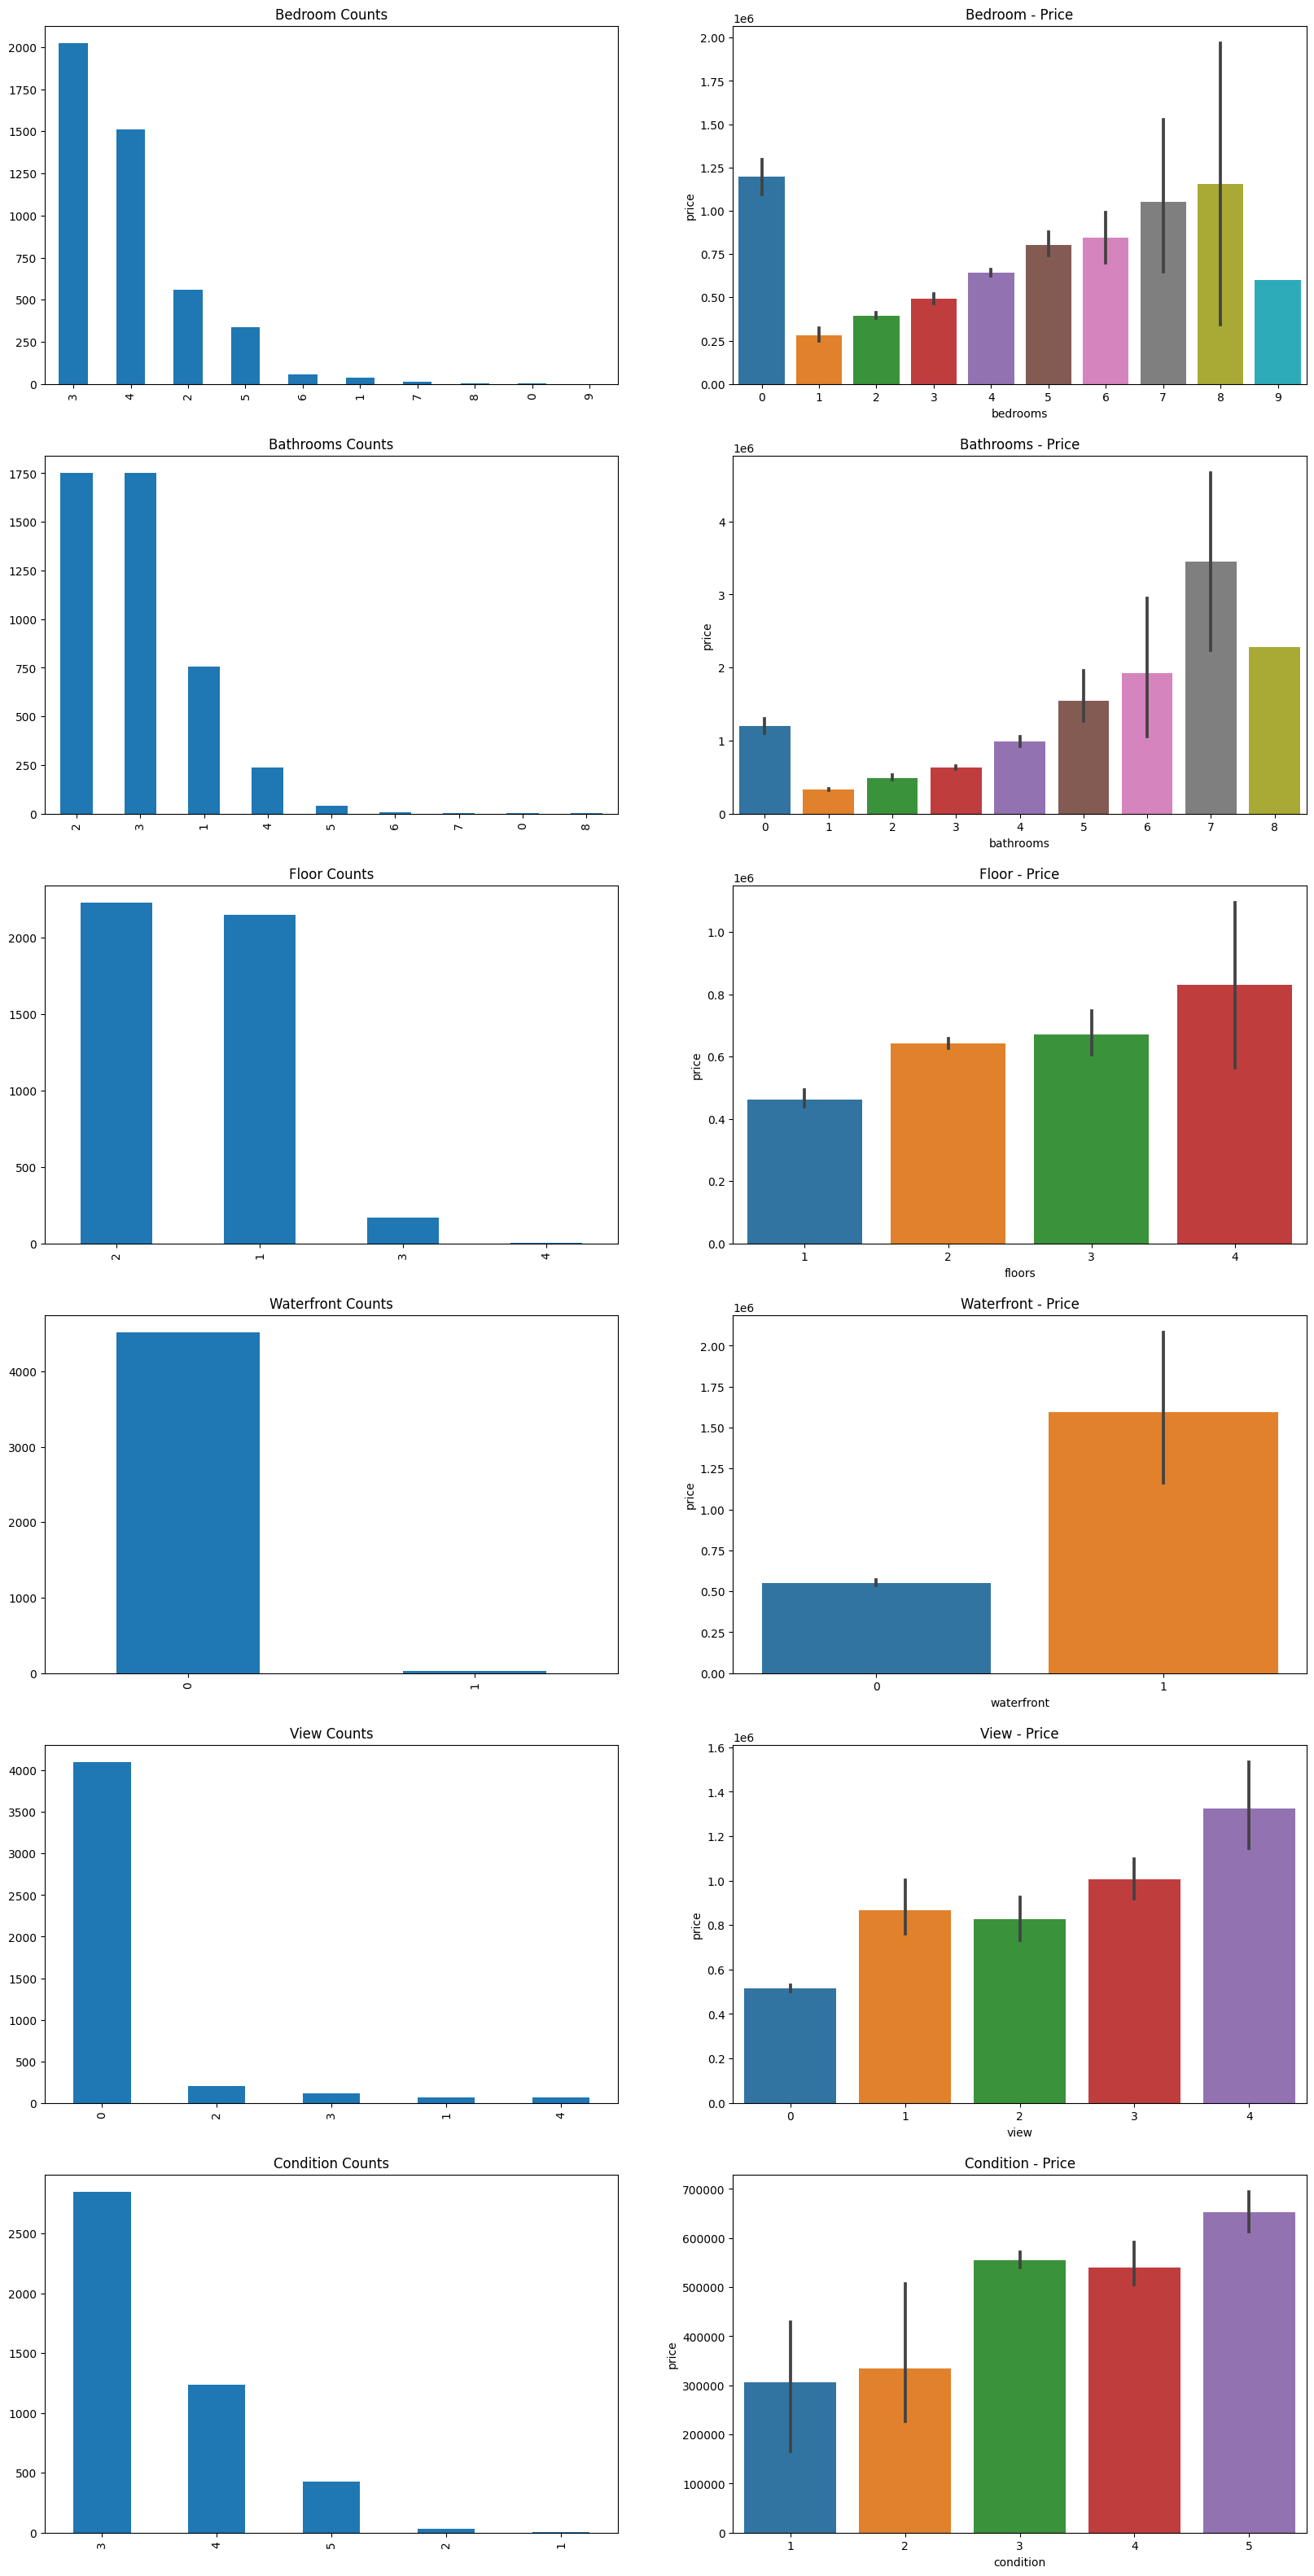

In [ ]:
# Univariate and Bivariant analysis of the categorical columns
plt.figure(figsize=(20,40))
plt.title('Analysis on Categorical Columns')

plt.subplot(6,2,1)
pd.value_counts(dataset['bedrooms']).plot(kind = 'bar')
plt.title('Bedroom Counts')

plt.subplot(6,2,2)
sns.barplot(x = dataset['bedrooms'], y = dataset.price)
plt.title('Bedroom - Price')

plt.subplot(6,2,3)
pd.value_counts(dataset['bathrooms']).plot(kind = 'bar')
plt.title('Bathrooms Counts')

plt.subplot(6,2,4)
sns.barplot(x = dataset['bathrooms'], y = dataset.price)
plt.title('Bathrooms - Price')

plt.subplot(6,2,5)
pd.value_counts(dataset['floors']).plot(kind = 'bar')
plt.title('Floor Counts')

plt.subplot(6,2,6)
sns.barplot(x = dataset['floors'], y = dataset.price)
plt.title('Floor - Price')

plt.subplot(6,2,7)
pd.value_counts(dataset['waterfront']).plot(kind = 'bar')
plt.title('Waterfront Counts')

plt.subplot(6,2,8)
sns.barplot(x = dataset['waterfront'], y = dataset.price)
plt.title('Waterfront - Price')

plt.subplot(6,2,9)
pd.value_counts(dataset['view']).plot(kind = 'bar')
plt.title('View Counts')

plt.subplot(6,2,10)
sns.barplot(x = dataset['view'], y = dataset.price)
plt.title('View - Price')

plt.subplot(6,2,11)
pd.value_counts(dataset['condition']).plot(kind = 'bar')
plt.title('Condition Counts')

plt.subplot(6,2,12)
sns.barplot(x = dataset['condition'], y = dataset.price)
plt.title('Condition - Price')

plt.show()

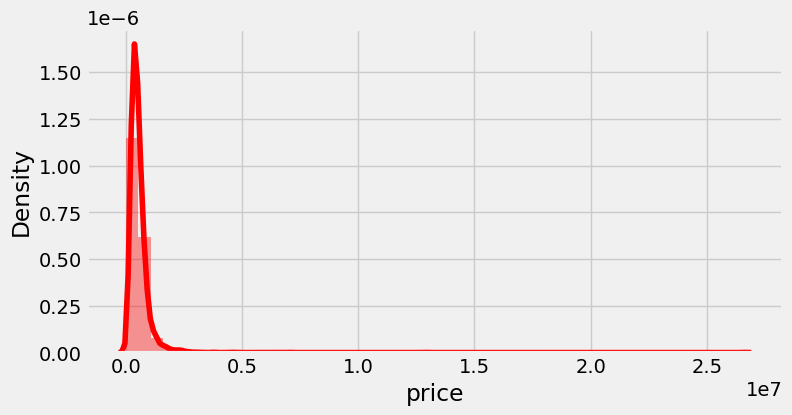

In [ ]:
# Checking the distribubtion of Price
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,4)

sns.distplot(dataset['price'], color = 'red', kde = True)
plt.show()

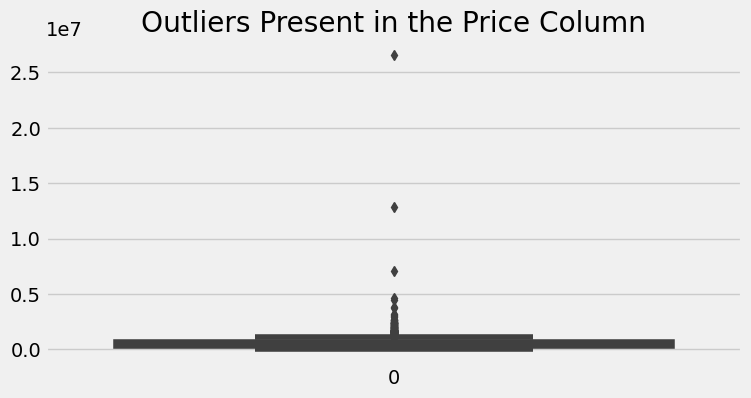

In [ ]:
# Visualizing the outliers present in price column using box- plot
sns.boxplot(dataset['price'])
plt.title('Outliers Present in the Price Column')
plt.show()

In [ ]:
# Calculating the 1st quartile and 3rd quartile
q1 = dataset['price'].quantile(0.25)
q3 = dataset['price'].quantile(0.75)

# calculating the interquartile range (IQR)
IQR = q3 - q1

#defining the upper and lower bounds for outlier detection
upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

# Find the ouliers in the column
outliers = dataset[(dataset['price'] < lower_bound) | (dataset['price']> upper_bound)]

#count the no. of outliers
Outlier_count = len(outliers)
print('Number of Outliers present in price column :', Outlier_count)
outliers.head()

Number of Outliers present in price column : 240


,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
1,2014,2384000.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119
11,2014,1400000.0,4,3,2920,4000,2,0,0,5,1910,1010,1909,1988,Seattle,98105
14,2014,1200000.0,5,3,2910,9480,2,0,0,3,2910,0,1939,1969,Seattle,98105
99,2014,1395000.0,5,4,4010,8510,2,0,1,5,2850,1160,1971,0,Seattle,98105
122,2014,2280000.0,7,8,13540,307752,3,0,4,3,9410,4130,1999,0,Redmond,98053


In [ ]:
#converting the outlier values to nan
dataset['price'][outliers.index] = np.nan
dataset.head()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2014,NaN,5,3,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,98042
3,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,98008
4,2014,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,98052


In [ ]:
# adding the mean value in place of nan

nan_value = round(dataset['price'].mean())

dataset['price'].fillna(nan_value, inplace = True)

In [ ]:
dataset.head()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014,313000.0,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,Shoreline,98133
1,2014,487457.0,5,3,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,98042
3,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,98008
4,2014,550000.0,4,3,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,98052


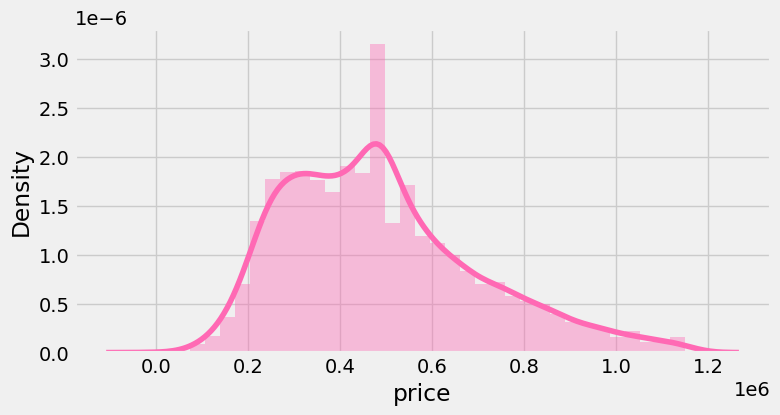

In [ ]:
# Again checking the price distribution
sns.distplot(dataset['price'], color = "hotpink", kde = True)
plt.show()

 Log Transformation on Target variable

 with the help of Q-Q plot we can see whether the target variable is normally distributed or not.

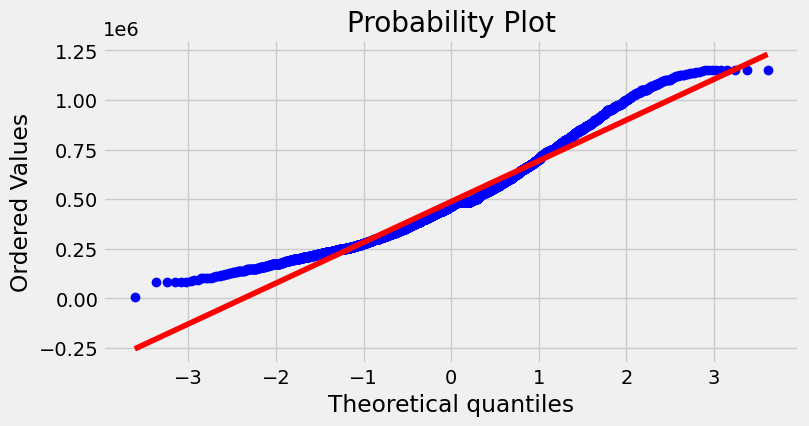

In [ ]:
# plotting Q-Q plot
fig = plt.figure()
res = stats.probplot(dataset['price'], plot=plt)
plt.show()

As the Price(target variable) is very skewed, so we apply log- transformation on target variable to make it normally distributed.

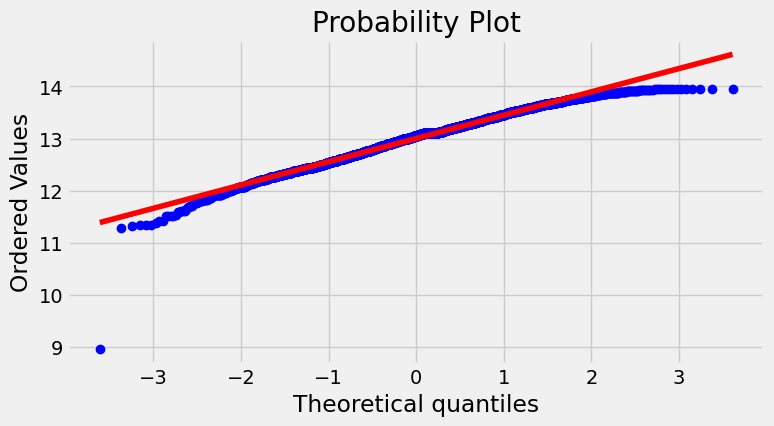

In [ ]:
#applying the log-transformation
dataset['price'] = np.log(dataset['price'])

fig = plt.figure()
res = stats.probplot(dataset['price'], plot = plt)
plt.show()


<Axes: xlabel='price', ylabel='Density'>

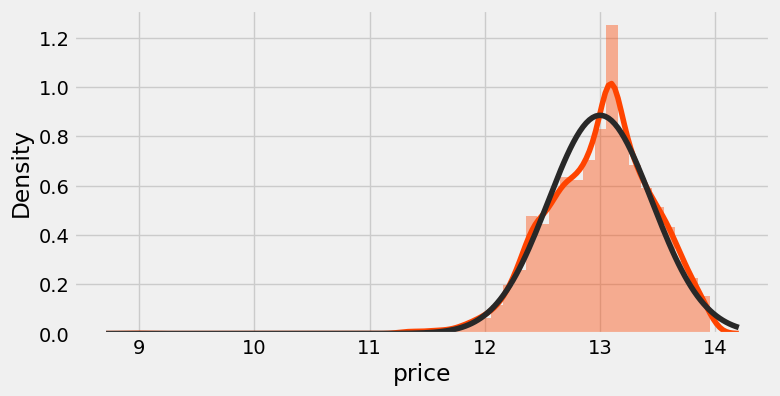

In [ ]:
# checking again the distribution of price
sns.distplot(dataset['price'],color = '#ff4400', kde = True, fit = norm)

Encoding Independent variables

In [ ]:
# applying encoding on columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['price'] = label_encoder.fit_transform(dataset['price'])
dataset['city'] = label_encoder.fit_transform(dataset['city'])
dataset['bedrooms'] = label_encoder.fit_transform(dataset['bedrooms'])
dataset['bathrooms'] = label_encoder.fit_transform(dataset['bathrooms'])
dataset['sqft_living'] = label_encoder.fit_transform(dataset['sqft_living'])
dataset['sqft_lot'] = label_encoder.fit_transform(dataset['sqft_lot'])
dataset['sqft_above'] = label_encoder.fit_transform(dataset['sqft_above'])
dataset['sqft_basement'] = label_encoder.fit_transform(dataset['sqft_basement'])
dataset['yr_built'] = label_encoder.fit_transform(dataset['yr_built'])
dataset['yr_renovated'] = label_encoder.fit_transform(dataset['yr_renovated'])

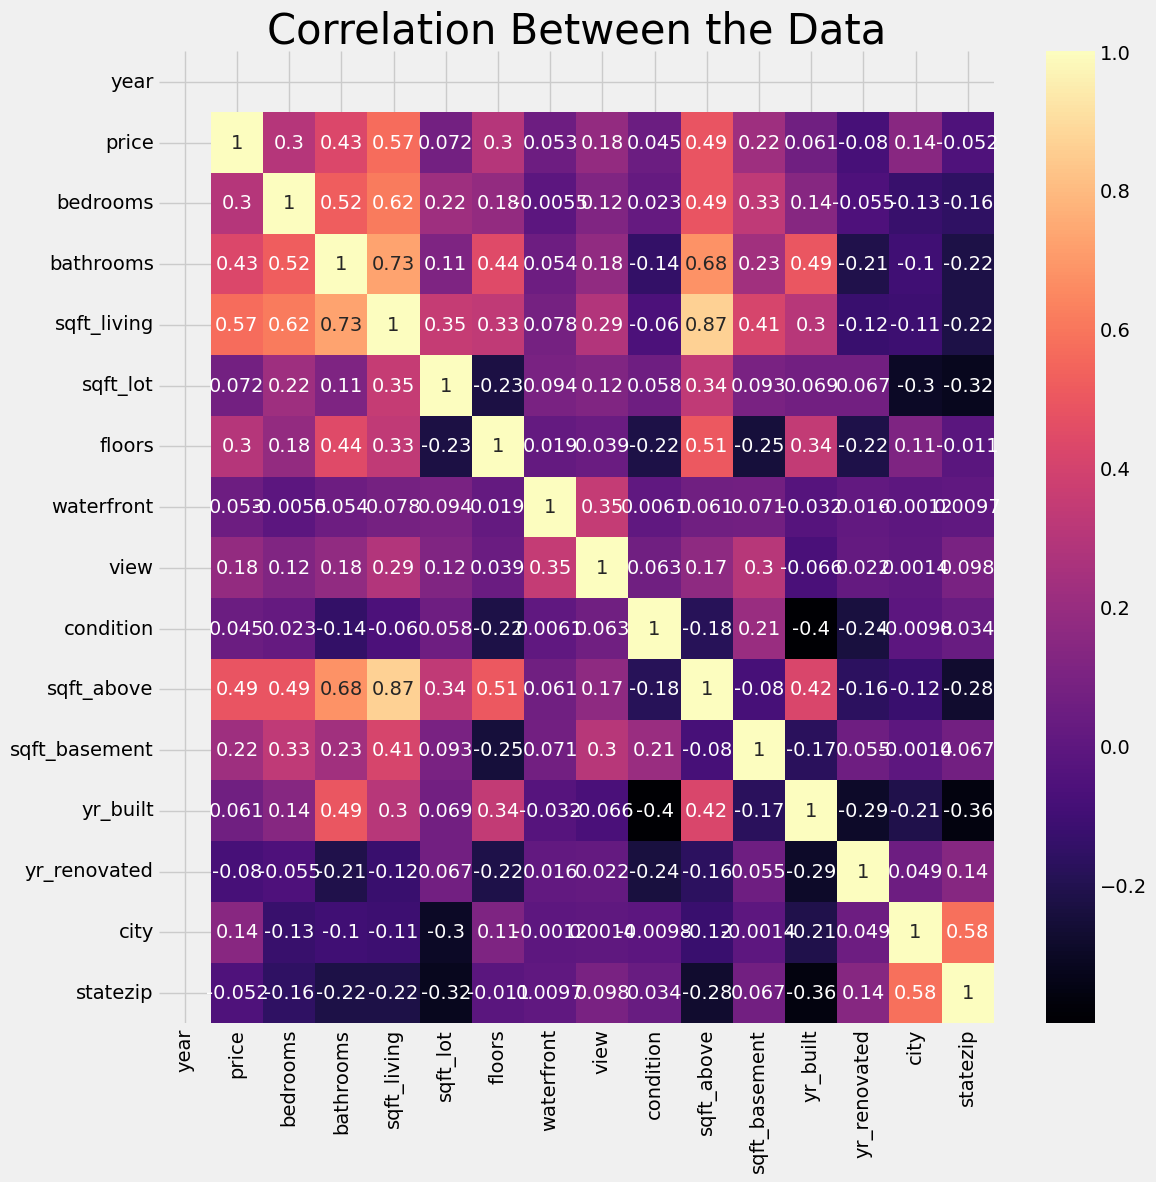

In [ ]:
# creating heatmap to check the correlation in the dataset
plt.rcParams['figure.figsize'] = (12,12)
sns.heatmap(dataset.corr(), annot = True, cmap='magma')
plt.title('Correlation Between the Data', size = 30)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
data =dataset.copy()
data.head()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,2014,401,3,2,93,1391,2,0,0,3,96,0,55,49,36,98133
1,2014,866,5,3,406,1691,2,0,4,5,373,29,21,0,35,98119
2,2014,486,3,2,180,2185,1,0,0,4,182,0,66,0,18,98042
3,2014,705,3,2,191,1431,1,0,0,4,52,109,63,0,3,98008
4,2014,998,4,3,181,2016,1,0,0,4,70,85,76,36,31,98052


In [ ]:
data.dtypes

year             int64
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
city             int64
statezip         int64
dtype: object

Task 4 :- **Data Preprocessing**

Splitting the Data and Target

In [ ]:
# creating dependent and independent sets
x = data.drop(['price'], axis = 1)
y = data['price']

print(x.head())
print(y.head())

   year  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  2014         3          2           93      1391       2           0     0   
1  2014         5          3          406      1691       2           0     4   
2  2014         3          2          180      2185       1           0     0   
3  2014         3          2          191      1431       1           0     0   
4  2014         4          3          181      2016       1           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  \
0          3          96              0        55            49    36   
1          5         373             29        21             0    35   
2          4         182              0        66             0    18   
3          4          52            109        63             0     3   
4          4          70             85        76            36    31   

   statezip  
0     98133  
1     98119  
2     98042  
3     98008  
4   

In [ ]:
# Training and testing the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [ ]:
# Looking the shape of the training and testing dataset
print(x_train.shape)
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)

(3185, 15)
(3185,)
(3185, 15)
(1366,)


Feature Scaling

In [ ]:
# performing standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Task 5 :- **Model Training and Evaluation**

Model Training

In [ ]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)

In [ ]:
#creating a random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

In [ ]:
#creating a gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
y_pred3 = gb.predict(x_test)

In [ ]:
#creating a svr model
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_pred4 = svr.predict(x_test)

In [ ]:
#Creating a decision tree regressor mode
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred5 = dt.predict(x_test)

In [ ]:
# Creating ridge model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred6 = ridge.predict(x_test)

In [ ]:
# Creating elasticnet model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred7 = xgb.predict(x_test)

Evaluation Metrics



*   R2 score
*   Root Mean Squared Error (RMSE)
*   Mean Squared Error(MSE)



In [ ]:
# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error

r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)
r2_score6 = r2_score(y_test, y_pred6)
r2_score7 = r2_score(y_test, y_pred7)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
mse6 = mean_squared_error(y_test, y_pred6)
mse7 = mean_squared_error(y_test, y_pred7)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)
rmse7 = np.sqrt(mse7)


print('Linear Regression R2 Score :', r2_score1)
print('Linear Regression MSE :     ', mse1)
print('Linear Regression RMSE :    ', rmse1)
print('Random Forest R2 Score :    ', r2_score2)
print('Random Forest MSE :         ', mse2)
print('Random Forest RMSE :        ', rmse2)
print('Gradient Boosting R2 Score :', r2_score3)
print('Gradient Boosting MSE :    ', mse3)
print('Gradient Boosting RMSE :   ', rmse3)
print('SVR R2 Score :             ', r2_score4)
print('SVR MSE :                  ', mse4)
print('SVR RMSE :                 ', rmse4)
print('Decision Tree R2 Score :   ', r2_score5)
print('Decision Tree MSE :        ', mse5)
print('Decision Tree RMSE :       ', rmse5)
print('Ridge R2 Score :           ', r2_score6)
print('Ridge MSE :                ', mse6)
print('Ridge RMSE :               ', rmse6)
print('XGBRegressor R2 Score :     ', r2_score7)
print('XGBRegressor MSE :          ', mse7)
print('XGBRegressor RMSE :        ', rmse7)



Linear Regression R2 Score : 0.40547258086946214
Linear Regression MSE :      101875.18194316012
Linear Regression RMSE :     319.1789183877283
Random Forest R2 Score :     0.7006757486692341
Random Forest MSE :          51290.67488412437
Random Forest RMSE :         226.47444642635594
Gradient Boosting R2 Score : 0.6537416662414192
Gradient Boosting MSE :     59333.059529161386
Gradient Boosting RMSE :    243.58378338707482
SVR R2 Score :              0.19504175487748898
SVR MSE :                   137933.53349191308
SVR RMSE :                  371.39404073290285
Decision Tree R2 Score :    0.4289562658598626
Decision Tree MSE :         97851.13762811128
Decision Tree RMSE :        312.81166478907284
Ridge R2 Score :            0.4056020361057635
Ridge MSE :                 101852.99915507108
Ridge RMSE :                319.1441667257465
XGBRegressor R2 Score :      0.7327495279943108
XGBRegressor MSE :           45794.67587851835
XGBRegressor RMSE :         213.9969062358574


In [ ]:
# checking scoree of the models
print("Linear Regression :",lr.score(x_test,y_test))
print("Random Forest :    ",rf.score(x_test,y_test))
print("Gradient Boosting :",gb.score(x_test,y_test))
print("SVR :              ",svr.score(x_test,y_test))
print("Decision Tree :    ",dt.score(x_test,y_test))
print("Ridge :            ",ridge.score(x_test,y_test))
print("XGBRegressor :     ",xgb.score(x_test,y_test))

Linear Regression : 0.40547258086946214
Random Forest :     0.7006757486692341
Gradient Boosting : 0.6537416662414192
SVR :               0.19504175487748898
Decision Tree :     0.4289562658598626
Ridge :             0.4056020361057635
XGBRegressor :      0.7327495279943108


Task 6 :- **Model Optimization**

* cross validation




In [ ]:
# calculate the train and test scores of xgbregressor model
train_score = xgb.score(x_train, y_train)
test_score = xgb.score(x_test,y_test)

print('Training Score -', train_score)
print('Testing Score -', train_score)

Training Score - 0.9737314250475622
Testing Score - 0.9737314250475622


In [ ]:
# Performing cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb,x,y, cv=10)
print(scores)
print("Average Score -", scores.mean())

[0.71159835 0.80401252 0.71774686 0.74638516 0.77127077 0.75102549
 0.77259497 0.78026237 0.76825846 0.55892316]
Average Score - 0.7382078109715859


* Evaluating the Algorithms

In [ ]:
# creating dataframe for models with scores
final_data = pd.DataFrame({'Models' : ['Linear Regression', 'Random Forest','Gradient Boosting Regressor', 'SVR', 'Decision Tree Regressor','Elastic Net','XGBRegressor'],'R2_Score': [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5, r2_score6, r2_score7]})

model_df = pd.DataFrame(final_data)

#sort the dataframe based on r2_score in descending order
model_df_sorted = model_df.sort_values(by = 'R2_Score', ascending = False)

#applying background gradient to the r2_score
model_df_sorted_styled = model_df_sorted.style.background_gradient(subset =['R2_Score'], cmap = 'copper')
model_df_sorted_styled


,Models,R2_Score
6,XGBRegressor,0.732750
1,Random Forest,0.700676
2,Gradient Boosting Regressor,0.653742
4,Decision Tree Regressor,0.428956
5,Elastic Net,0.405602
0,Linear Regression,0.405473
3,SVR,0.195042


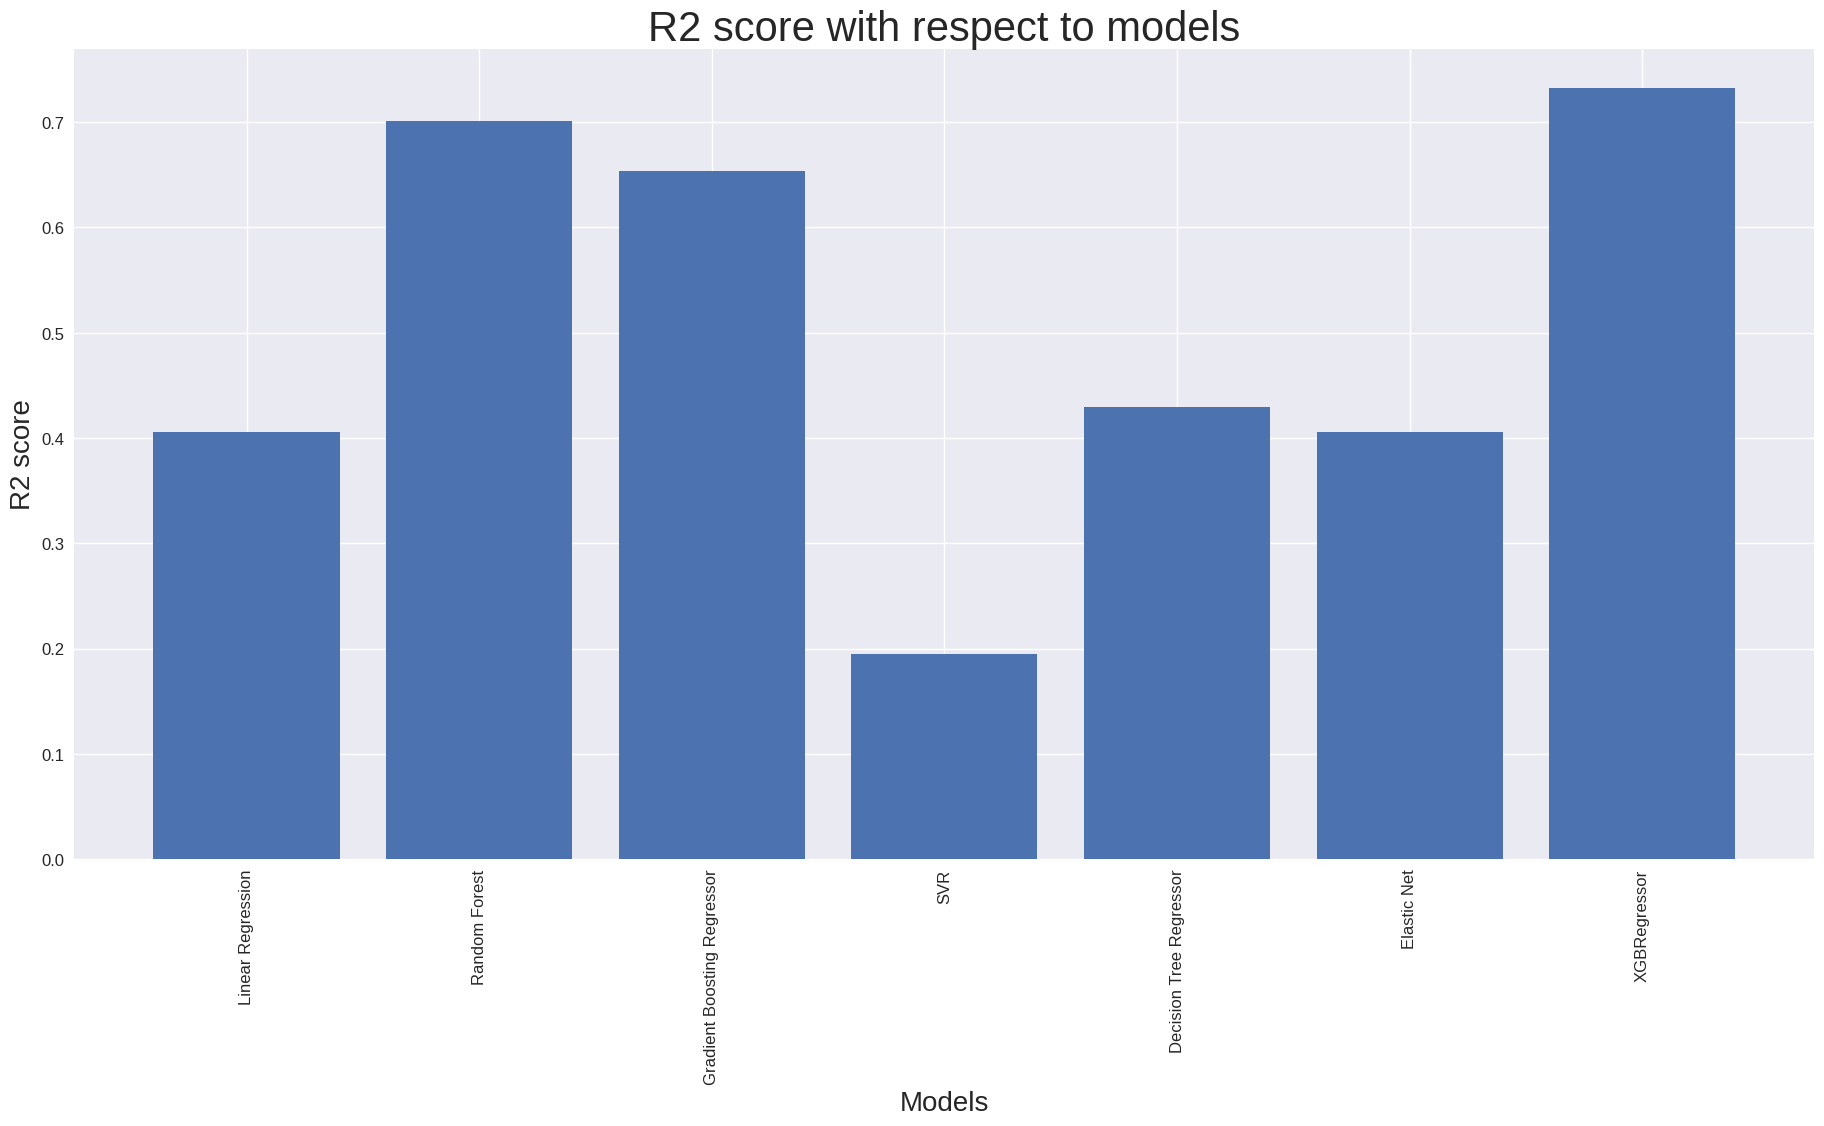

In [ ]:
# visualizing the scores on barplot
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(final_data['Models'], final_data['R2_Score'])

plt.xlabel('Models', fontsize = 20)
plt.ylabel('R2 score', fontsize = 20)
plt.title('R2 score with respect to models', fontsize = 30)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12, rotation = 0)
plt.show()


* Creating Pickel File

In [ ]:
import pickle
pickle.dump(rf, open("model_rf.pkl",'wb'))


In [ ]:
data.to_csv('processed_data.csv',index = False)